In [427]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run 1.FB-messages_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 
import copy
import random
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
%store -r points
%store -r random_numbers_matrix

In [428]:
def LR(x):
    return np.exp(-x/80)*0.01+0.00001

In [430]:
num_samples = 1266
alpha = 2
dim = 12

In [431]:
True_posetiv = np.zeros(len(random_numbers_matrix))
True_negativ = np.zeros(len(random_numbers_matrix))
False_posetiv = np.zeros(len(random_numbers_matrix))
False_negativ = np.zeros(len(random_numbers_matrix))

True_posetiv_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_baseline = np.zeros(len(random_numbers_matrix))

True_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))

In [432]:
for s in range(len(random_numbers_matrix)): #len(random_numbers_matrix)
    Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 1000000002
    grad = 0
    n = 100000
    points_copy = copy.deepcopy(points)
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 1: # stopping criteria TOG 900 MIN MED 100
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy[i] += LR((k+1))*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        k += 1

    connections = Y[random_numbers_matrix[s].flatten().astype(int), 0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[s] = np.sum(connections * sigmoid_value >= 0.5)
    False_posetiv[s] = np.sum(connections * sigmoid_value <= -0.5)
    True_negativ[s] = np.sum((connections * sigmoid_value > -0.5) & (connections * sigmoid_value < 0))
    False_negativ[s] = np.sum((connections * sigmoid_value >= 0) & (connections * sigmoid_value < 0.5))

    Baseline = Baseline_function(Y, random_numbers_matrix[s].flatten().astype(int), Y_updated)
    Baseline += 1
    True_posetiv_baseline[s] = np.sum(connections * Baseline >= 1.5)
    False_posetiv_baseline[s] = np.sum(connections * Baseline <= -1.5)
    True_negativ_baseline[s] = np.sum((connections * Baseline > -1.5) & (connections * Baseline <= -1))
    False_negativ_baseline[s] = np.sum((connections * Baseline >= 1) & (connections * Baseline < 1.5))

    count = sum(1 for row in Y_updated if row[0] == 1)
    True_posetiv_stupid_baseline[s] = np.sum(connections*count/len(Y_updated) >= 0.5)
    False_posetiv_stupid_baseline[s] = np.sum(connections*count/len(Y_updated) <= -0.5)
    True_negativ_stupid_baseline[s] = np.sum((connections*count/len(Y_updated) > -0.5) & (connections*count/len(Y_updated) <= 0))
    False_negativ_stupid_baseline[s] = np.sum((connections*count/len(Y_updated) > 0) & (connections*count/len(Y_updated) < 0.5))


1000000002
-16434360.381745901
12097559.795390222
1446472.6299283504
-67248.0041299886
-337176.68159280065
-343187.89689025795
-254833.905533602
-119685.40545439068
43241.213741519954
156800.15051002754
302419.08035074826
429165.5583943282
509940.56477382453
528453.5767907286
499824.12294265465
432578.1218469881
349502.13935864286
266001.32292543945
207807.32624548755
162448.8124347799
78923.87913891354
9849.00274595875
1962.9537597811723
1701.3602805471382
1567.1546147924782
1448.4930057570018
1342.1261918084128
1245.9550982835026
1158.5453442088437
1078.7450030969521
1005.6177797762866
938.3968719558725
876.4513623477033
819.2587841945242
766.3825717645777
717.4532965223916
672.1529509312277
630.2019968326895
591.3492244271474
555.3644571080622
522.0338639467554
491.1573432650148
462.54729793653496
436.0281672350029
411.4362405562497
388.6194665671974
367.43712904885797
347.7593664031483
329.4665679325608
312.44869936019313
296.60460715884074
281.84133822028707
268.0734964995045
255.

In [434]:
%store -r points_copy_prior
True_posetiv_prior = np.zeros(len(random_numbers_matrix))
True_negativ_prior = np.zeros(len(random_numbers_matrix))
False_posetiv_prior = np.zeros(len(random_numbers_matrix))
False_negativ_prior = np.zeros(len(random_numbers_matrix))

point_a = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
point_b = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
points_a_np = np.array(point_a)
points_b_np = np.array(point_b)

distances_prior = np.sum((points_a_np - points_b_np) ** 2, axis=1)
sigmoid_value_prior = 1 / (1 + np.exp(-1 * (alpha - distances_prior)))

True_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior >= 0.5)
False_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior <= -0.5)
True_negativ_prior[s] = np.sum((connections*sigmoid_value_prior > -0.5) & (connections*sigmoid_value_prior < 0))
False_negativ_prior[s] = np.sum((connections*sigmoid_value_prior >= 0) & (connections*sigmoid_value_prior < 0.5))

In [435]:
print('LDM no prior', np.array([[True_posetiv[s], False_negativ[s]],
        [False_posetiv[s], True_negativ[s]]]))
print('LDM prior', np.array([[True_posetiv_prior[s], False_negativ_prior[s]],
        [False_posetiv_prior[s], True_negativ_prior[s]]]))
print('Complex baseline', np.array([[True_posetiv_baseline[s], False_negativ_baseline[s]],
        [False_posetiv_baseline[s], True_negativ_baseline[s]]]))
print('Simple baseline', np.array([[True_posetiv_stupid_baseline[s], False_negativ_stupid_baseline[s]],
        [False_posetiv_stupid_baseline[s], True_negativ_stupid_baseline[s]]]))

LDM no prior [[5.0000e+00 1.6900e+02]
 [2.1000e+01 2.3827e+04]]
LDM prior [[5.0000e+00 1.6900e+02]
 [2.1000e+01 2.3827e+04]]
Complex baseline [[0.0000e+00 1.7400e+02]
 [1.2000e+01 2.3836e+04]]
Simple baseline [[    0.   174.]
 [    0. 23848.]]


In [506]:
print('Accuracy', (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value)))
print('Accuracy_prior', (True_posetiv_prior[s]+True_negativ_prior[s])/(len(sigmoid_value)))
print('Accuracy_baseline', (True_posetiv_baseline[s]+True_negativ_baseline[s])/(len(sigmoid_value)))
print('Accuracy_stupid_baseline', (True_posetiv_stupid_baseline[s]+True_negativ_stupid_baseline[s])/(len(sigmoid_value)))

print('Precision', True_posetiv/(True_posetiv+False_posetiv))
print('Precision prior', True_posetiv_prior/(True_posetiv_prior+False_posetiv_prior))
print('Precision baseline', True_posetiv_baseline/(True_posetiv_baseline+False_posetiv_baseline))
print('Precision simple baseline', True_posetiv_stupid_baseline/(1))

print('Recall', True_posetiv/(True_posetiv+False_negativ))
print('Recall prior', True_posetiv_prior/(True_posetiv_prior+False_negativ_prior))
print('Recall baseline', True_posetiv_baseline/(True_posetiv_baseline+False_negativ_baseline))
print('Recall simple baseline', True_posetiv_stupid_baseline/(1))

Accuracy 0.992090583631671
Accuracy_prior 0.992090583631671
Accuracy_baseline 0.9922570976604779
Accuracy_stupid_baseline 0.9927566397468987
Precision [0.19230769]
Precision prior [0.19230769]
Precision baseline [0.]
Precision simple baseline [0.]
Recall [0.02873563]
Recall prior [0.02873563]
Recall baseline [0.]
Recall simple baseline [0.]


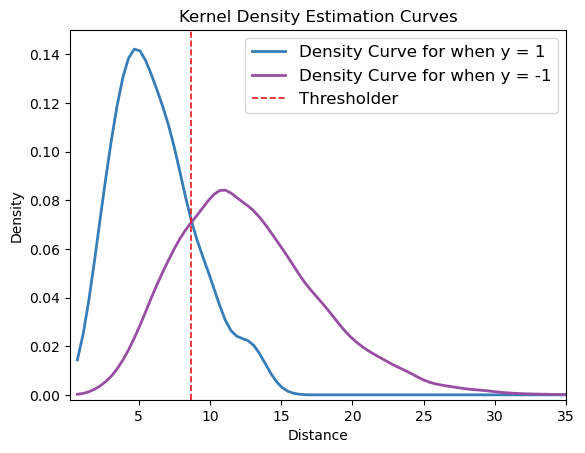

In [515]:
# Generate fake data (replace with your actual data)
x = distances
y = sigmoid_value

# Calculate the point density for connections == -1
xy_neg = np.vstack([x[connections == -1], y[connections == -1]])
z_neg = gaussian_kde(xy_neg)(xy_neg)

# Calculate the point density for connections == 1
xy_pos = np.vstack([x[connections == 1], y[connections == 1]])
z_pos = gaussian_kde(xy_pos)(xy_pos)

# Create the density curves
density_curve_neg = gaussian_kde(x[connections == -1])
density_curve_pos = gaussian_kde(x[connections == 1])

# Evaluate the curves at various points
x_values = np.linspace(min(x), max(x), 100)
y_values_neg = density_curve_neg(x_values)
y_values_pos = density_curve_pos(x_values)

# Find the x-value where the two curves cross
difference = y_values_neg - y_values_pos
cross_points = np.where(np.diff(np.sign(difference)))[0]
cross_x = x_values[cross_points]

# Plot the density curves
plt.plot(x_values, y_values_pos, label='Density Curve for when y = 1', color = '#377eb8', linewidth=2)
plt.plot(x_values, y_values_neg, label='Density Curve for when y = -1', color = '#984ea3', linewidth=2)
for cx in cross_x:
    plt.axvline(cx, color='#e41a1c', linestyle='--', label='Thresholder', linewidth=1.2)
plt.xlabel('Distance')
plt.ylabel('Density')
plt.xlim(0.2, 35)
plt.ylim(-0.002, 0.15)
plt.title('Kernel Density Estimation Curves')
plt.legend(prop={'size': 12})
plt.show()


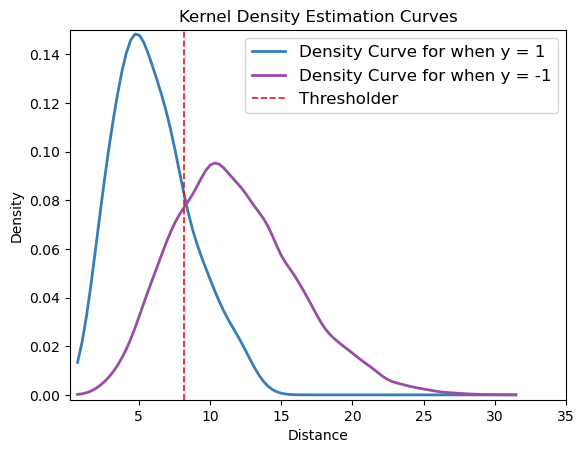

In [539]:
# Generate fake data (replace with your actual data)
x = distances_prior
y = sigmoid_value_prior

# Calculate the point density for connections == -1
xy_neg = np.vstack([x[connections == -1], y[connections == -1]])
z_neg = gaussian_kde(xy_neg)(xy_neg)

# Calculate the point density for connections == 1
xy_pos = np.vstack([x[connections == 1], y[connections == 1]])
z_pos = gaussian_kde(xy_pos)(xy_pos)

# Create the density curves
density_curve_neg = gaussian_kde(x[connections == -1])
density_curve_pos = gaussian_kde(x[connections == 1])

# Evaluate the curves at various points
x_values = np.linspace(min(x), max(x), 100)
y_values_neg = density_curve_neg(x_values)
y_values_pos = density_curve_pos(x_values)

# Find the x-value where the two curves cross
difference = y_values_neg - y_values_pos
cross_points = np.where(np.diff(np.sign(difference)))[0]
cross_x = x_values[cross_points]

# Plot the density curves
plt.plot(x_values, y_values_pos, label='Density Curve for when y = 1', color = '#377eb8', linewidth=2)
plt.plot(x_values, y_values_neg, label='Density Curve for when y = -1', color = '#984ea3', linewidth=2)
for cx in cross_x:
    plt.axvline(cx, color='#e41a1c', linestyle='--', label='Thresholder', linewidth=1.2)
plt.xlabel('Distance')
plt.ylabel('Density')
plt.xlim(0.2, 35)
plt.ylim(-0.002, 0.15)
plt.title('Kernel Density Estimation Curves')
plt.legend(prop={'size': 12})
plt.show()


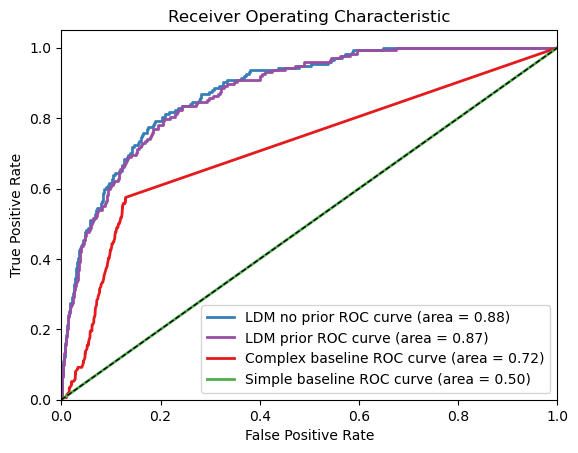

In [439]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
y_true = copy.deepcopy(connections)
y_true[y_true == -1] = 0

# Compute ROC curve and AUC
fpr1, tpr1, _ = roc_curve(y_true, sigmoid_value)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_true, sigmoid_value_prior)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_true, Baseline)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_true, [count/len(Y_updated)]*len(y_true))
roc_auc4 = auc(fpr4, tpr4)

# Plot the ROC curve for all models
plt.figure()
plt.plot(fpr1, tpr1, color='#377eb8', lw=2, label='LDM no prior ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='#984ea3', lw=2, label='LDM prior ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='#e41a1c', lw=2, label='Complex baseline ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='#4daf4a', lw=2, label='Simple baseline ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [449]:
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

# Sample data
y_pred1 = sigmoid_value >= 0.5
y_pred2 = sigmoid_value_prior >= 0.5
y_pred3 = Baseline >= 1.5
y_pred4 = np.array([count/len(Y_updated)]*len(y_true)) >= 0.5

# Create contingency table
contingency_table = confusion_matrix(y_pred3 == y_true, y_pred4 == y_true)
print("Contingency Table:\n", contingency_table)

# Perform McNemar test
result = mcnemar(contingency_table, exact=True)
print(f"p-value: {result.pvalue}")

# Interpretation
alpha = 0.05
if result.pvalue < alpha:
    print("There is a significant difference between the two classifiers.")
else:
    print("There is no significant difference between the two classifiers.")


Contingency Table:
 [[  174    12]
 [    0 23836]]
p-value: 0.00048828125
There is a significant difference between the two classifiers.
